Implementing K-Means Clustering
Task: Apply K-Means clustering to the Iris dataset and visualize the clusters using a scatter plot of two features. Evaluate the clustering by comparing it to the actual species labels.


E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


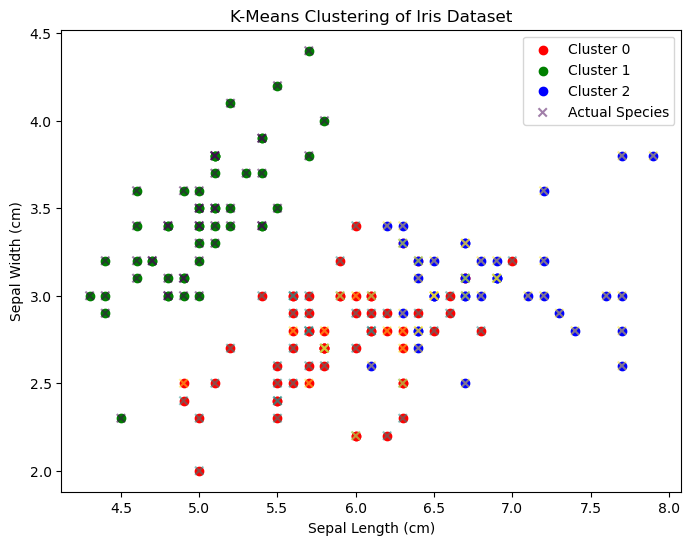

Adjusted Rand Index: 0.7302


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(iris.data)

colors = ['red', 'green', 'blue']

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(data.loc[data['cluster'] == i, 'sepal length (cm)'],
                data.loc[data['cluster'] == i, 'sepal width (cm)'],
                color=colors[i],
                label=f'Cluster {i}')

plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'],
            c=data['species'], cmap='viridis', alpha=0.5, marker='x', label='Actual Species')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.title('K-Means Clustering of Iris Dataset')
plt.show()

ari = adjusted_rand_score(data['species'], data['cluster'])
print(f'Adjusted Rand Index: {ari:.4f}')


Choosing the Optimal Number of Clusters
Task: Use the Elbow Method and Silhouette Score to determine the optimal number of clusters for the Iris dataset. Visualize the Silhouette Score for different cluster counts.

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

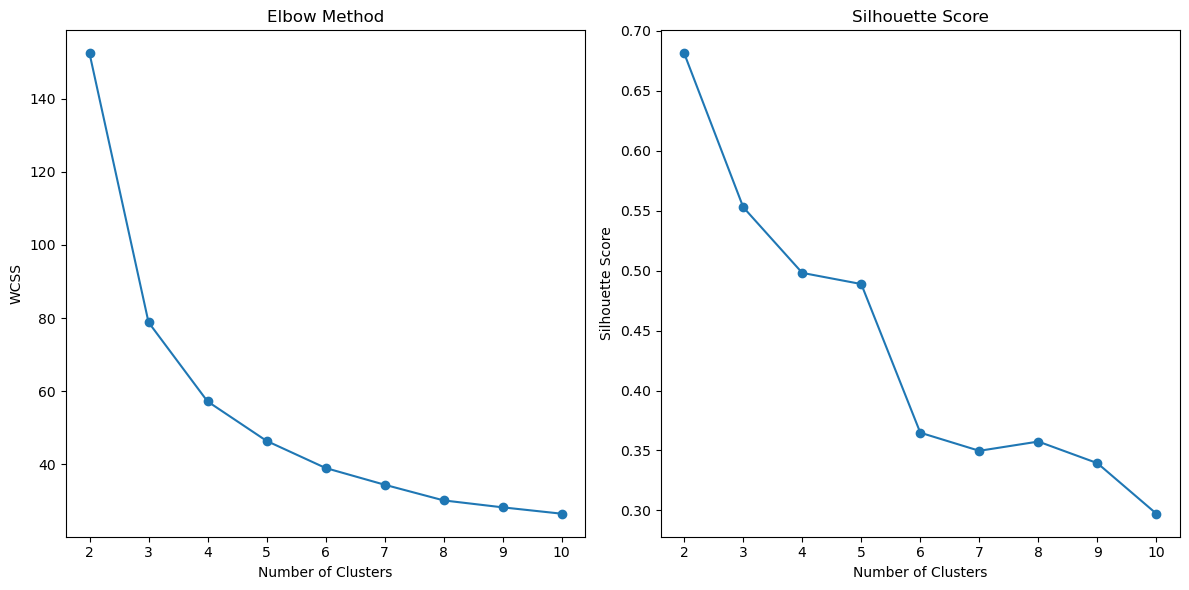

Optimal number of clusters based on Silhouette Score: 2


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

os.environ["OMP_NUM_THREADS"] = "1"

iris = load_iris()
X = iris.data

wcss = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

sil_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, clusters)
    sil_scores.append(sil_score)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

optimal_clusters = np.argmax(sil_scores) + 2
print(f'Optimal number of clusters based on Silhouette Score: {optimal_clusters}')


Cluster Visualization with PCA
Task: Use Principal Component Analysis (PCA) to reduce the Iris dataset to two dimensions. Visualize the clusters obtained from K-Means clustering in the PCA-reduced space.


E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


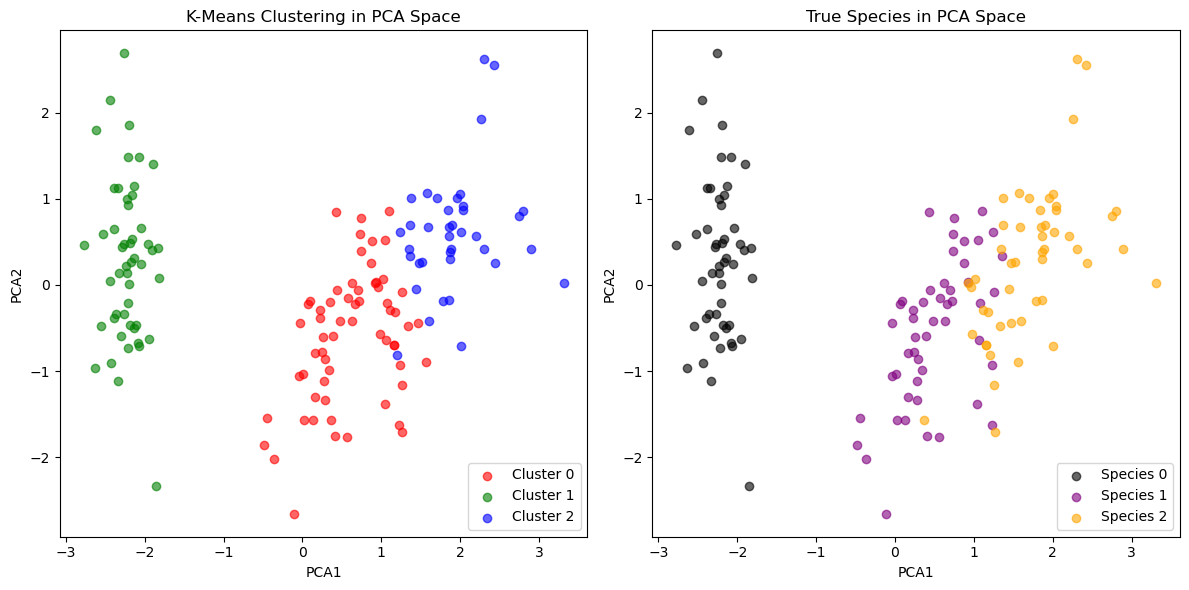

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = clusters
df_pca['species'] = y

colors = ['red', 'green', 'blue']
species_colors = ['black', 'purple', 'orange']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(df_pca[df_pca['cluster'] == i]['PCA1'],
                df_pca[df_pca['cluster'] == i]['PCA2'],
                color=colors[i],
                label=f'Cluster {i}',
                alpha=0.6)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering in PCA Space')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(df_pca[df_pca['species'] == i]['PCA1'],
                df_pca[df_pca['species'] == i]['PCA2'],
                color=species_colors[i],
                label=f'Species {i}',
                alpha=0.6)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('True Species in PCA Space')
plt.legend()

plt.tight_layout()
plt.show()


Hierarchical Clustering: Dendrogram
Task: Implement hierarchical clustering using the Iris dataset. Plot a dendrogram to visualize the clustering process and choose an appropriate number of clusters.


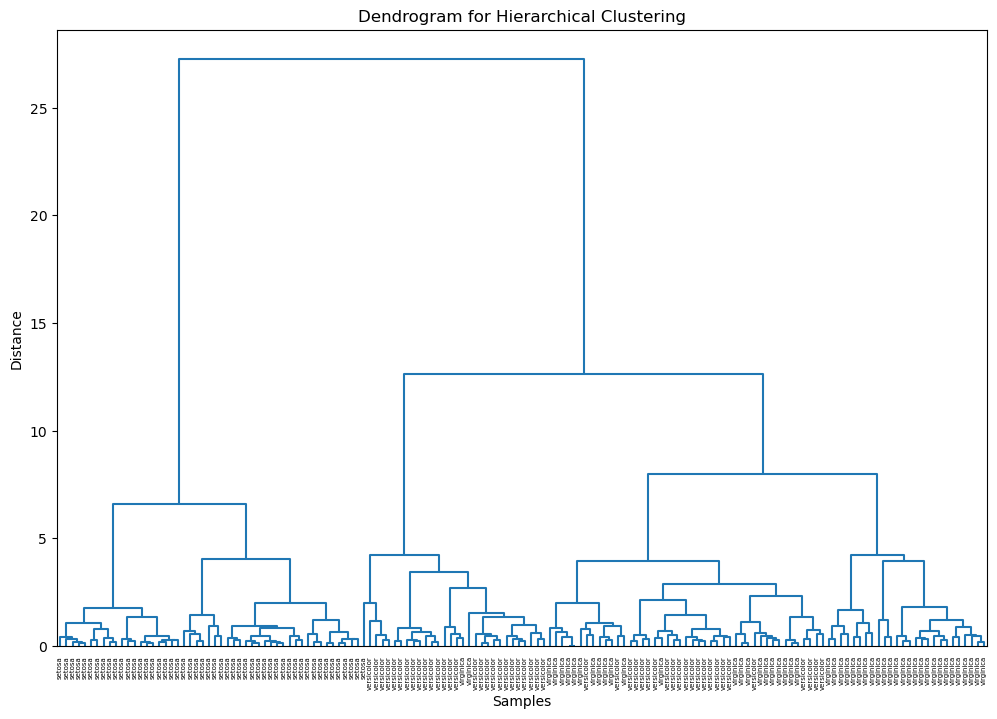

Cluster labels for each sample:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 2 3 2 2 2 2 3 3 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2 2 2 3 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, 
           labels=iris.target_names[y],  # Use the actual species names for labels
           color_threshold=0)

plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

num_clusters = 3 
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

print("Cluster labels for each sample:")
print(clusters)


Comparing Clustering Algorithms
Task: Compare the performance of K-Means and Agglomerative Hierarchical Clustering on the Iris dataset. Discuss the strengths and weaknesses of each approach based on the results.


E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means Silhouette Score: 0.460
Agglomerative Hierarchical Clustering Silhouette Score: 0.447


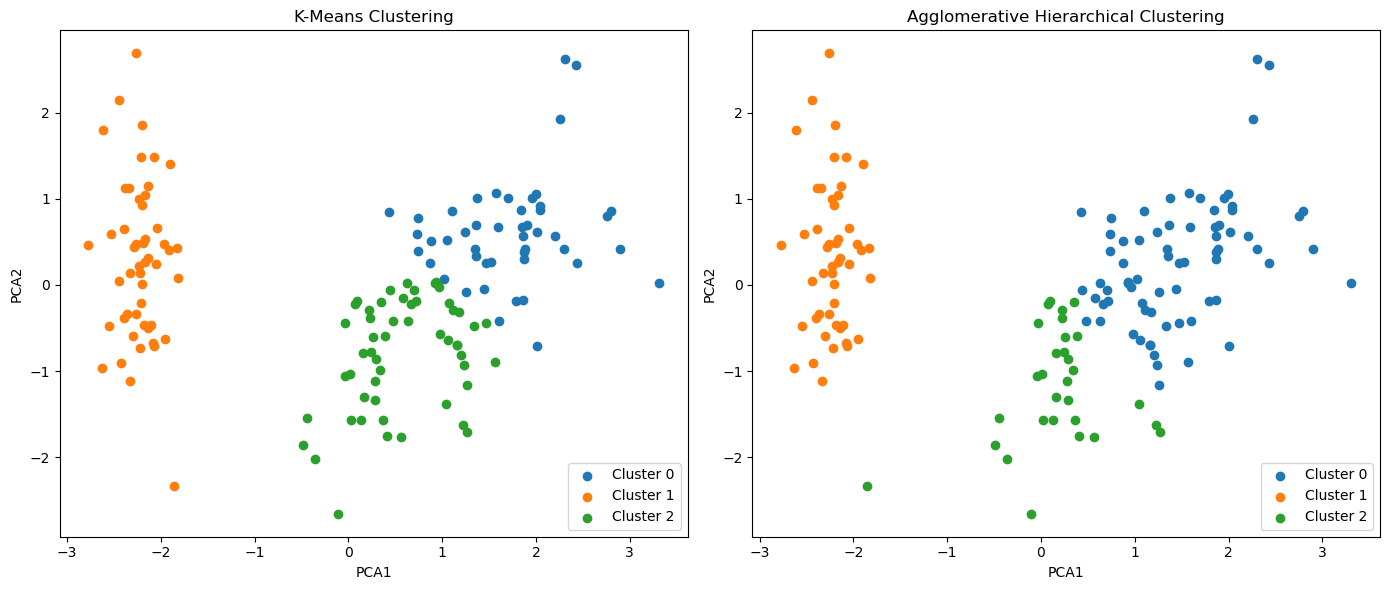

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_clusters)

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(X_scaled)
agg_silhouette = silhouette_score(X_scaled, agg_clusters)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"Agglomerative Hierarchical Clustering Silhouette Score: {agg_silhouette:.3f}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['KMeans Cluster'] = kmeans_clusters
df_pca['Agglomerative Cluster'] = agg_clusters
df_pca['True Species'] = y

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(df_pca[df_pca['KMeans Cluster'] == i]['PCA1'],
                df_pca[df_pca['KMeans Cluster'] == i]['PCA2'],
                label=f'Cluster {i}')
plt.title('K-Means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(df_pca[df_pca['Agglomerative Cluster'] == i]['PCA1'],
                df_pca[df_pca['Agglomerative Cluster'] == i]['PCA2'],
                label=f'Cluster {i}')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

plt.tight_layout()
plt.show()
